In [1]:
import pandas as pd
import numpy as np
from comodo.comodo import *

senticnet = pd.read_csv('senticnet.csv')


In [39]:
df = pd.read_csv('csv/analysis/grc.csv')


In [15]:
all_cond_df = pd.read_csv('csv/bigrams/train_df.csv', sep ='\t')

In [16]:
all_cond_df['all_bg']

0                                    symptom dr|flu symptom
1                         experience major|never experience
2                                                  hit side
3                                         bladder infection
4         make patch|much pain|not_think make|take much|...
                                ...                        
102007    great month|infusion week|away month|diagnose ...
102008    last day|feel good|pinch pain|quick pain|heat ...
102009    not_sure sick|report health|canada company|rev...
102010    wish good|remove facial|almost daily|find avai...
102011    phobia burden|front board|present prop|fear pu...
Name: all_bg, Length: 102012, dtype: object

In [43]:
#example of phrase composed by bigrams

[['really', 'ready'], ['stop', 'take'], ['ready', 'stop']]

# Describe variable: values

• n obs :   1637
• mean :   0.6267562614538791
• variance :   0.23407584092195613
• std :   0.4838138494524068
• min :   0.0
• q25 :   0.0
• q50 :   1.0
• q75 :   1.0
• max :   1.0
• range :   1.0
• skewness :   -0.5241478530142403
• kurtosis :   -1.7252690281805632




{'n obs': 1637,
 'mean': 0.6267562614538791,
 'variance': 0.23407584092195613,
 'std': 0.4838138494524068,
 'min': 0.0,
 'q25': 0.0,
 'q50': 1.0,
 'q75': 1.0,
 'max': 1.0,
 'range': 1.0,
 'skewness': -0.5241478530142403,
 'kurtosis': -1.7252690281805632}

<Figure size 432x288 with 0 Axes>

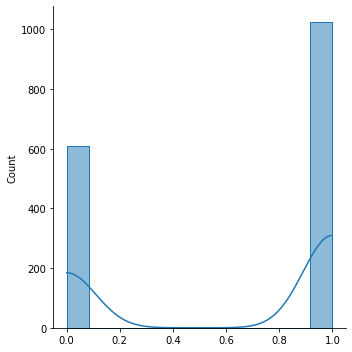

In [56]:
LIST.describe(ce)

In [9]:
senticnet[senticnet['CONCEPT'] == 'therapy']

,CONCEPT,INTROSPECTION,TEMPER,ATTITUDE,SENSITIVITY,PRIMARY EMOTION,SECONDAY EMOTION,POLARITY VALUE,POLARITY INTENSITY,SEM1,SEM2,SEM3,SEM4,SEM5
169674,therapy,0.196,0.0,0.0,0.0,#contentment,None,positive,0.196,spread_happiness,solution,electrocution,pleasure,joy


In [103]:
a

[[['really', 'ready'], ['stop', 'take'], ['ready', 'stop']],
 [['together', 'clinic']],
 [['bit', 'bullet'],
  ['suboxone', 'end'],
  ['take', 'suboxone'],
  ['renew', 'suboxone']],
 [['god', 'medication'], ['think', 'really']],
 [['ten', 'month'],
  ['serious', 'want'],
  ['back', 'old'],
  ['suboxone', 'ten'],
  ['tell', 'serious'],
  ['quit', 'addiction'],
  ['quit', 'use'],
  ['really', 'back'],
  ['take', 'suboxone'],
  ['mg', 'oxycontin'],
  ['use', 'suboxone'],
  ['take', 'really'],
  ['low', 'dose']],
 [['real', 'case'],
  ['drive', 'ghetto'],
  ['therapy', 'way'],
  ['new', 'job'],
  ['save', 'life'],
  ['cure', 'illegal'],
  ['sound', 'magical'],
  ['get', 'heroin'],
  ['suboxone', 'therapy'],
  ['get', 'new'],
  ['literally', 'save'],
  ['suboxone', 'cure']],
 [['seem', 'functional'],
  ['opiate', 'addiction'],
  ['form', 'oxycotin'],
  ['go', 'away'],
  ['self', 'use'],
  ['take', 'suboxone'],
  ['use', 'get']],
 [['vivitrol', 'excellent'], ['opiate', 'get']],
 [['medicatio

In [13]:
x1,x2,x3,x4 = senticnet[senticnet['CONCEPT'] == 'good'][['INTROSPECTION','TEMPER','ATTITUDE','SENSITIVITY']].values[0]

In [59]:
def create_polarity_df_v2(cond_df):

    #costruisco lista di bigrammi
    review_bg = [[y.split(' ') for y in x.split('|')] if not x is np.nan else [] for x in cond_df['all_bg'].to_list()]
    #guardo parole uniche
    dic = list(set(np.array([c for b in review_bg for i in b for c in i]).flatten()))
    #guardo quali parole non esistono in SenticNet
    ce = [True if len(senticnet[senticnet['CONCEPT'] == i]) > 0 else False for i in dic]
    blacklist = [x  for i, x in enumerate(dic) if ce[i] == False]
    #filtro bigrammi che hanno parole nella blacklist
    reviews = [[bg for bg in bgs if bg[0] not in blacklist or bg[1] not in blacklist] for bgs in review_bg ]
    #dic2 = list(set(np.array([c for b in a2 for i in b for c in i]).flatten()))
    
    all_polarities = []

    for review in reviews:

        polarity = []
        n_bigram = len(review)

        for i in range(2):
            introspection = []
            temper = []
            attitude = []
            sensitivity = []
            for n_bi in range(n_bigram):
                try:
                    word = review[n_bi][i]

                    #calcolo sent
                    not_flag = False
                    if word.startswith('not_'):
                        word = word.split('_')[1]
                        not_flag = True

                    i,t,a,s = senticnet[senticnet['CONCEPT'] == word][['INTROSPECTION','TEMPER','ATTITUDE','SENSITIVITY']].values[0]

                    
                    if not_flag:
                        i,t,a,s = np.array([i,t,a,s])*-1

                    introspection.append(i)
                    temper.append(t)
                    attitude.append(a)
                    sensitivity.append(s)
                except:
                    pass


            polarity.extend([np.mean(introspection), np.mean(temper), np.mean(attitude), np.mean(sensitivity)])
        all_polarities.append(polarity)

    dfPolarities = pd.DataFrame(all_polarities)
    return dfPolarities

In [60]:
ddf = create_polarity_df_v2(all_cond_df)
ddf.to_csv('new_all_cond.csv', index=False)

c:\users\merlo\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\merlo\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [61]:
ddf

,0,1,2,3,4,5,6,7
0,0.000,-0.255,0.000,0.000,0.000,-0.255,0.000,0.000
1,NaN,NaN,NaN,NaN,0.961,0.000,0.672,0.000
2,0.000,0.000,0.000,-0.834,NaN,NaN,NaN,NaN
3,0.000,0.000,0.000,-0.297,0.000,-0.185,0.000,0.000
4,0.865,0.000,0.000,0.816,0.000,-0.636,0.000,0.000
...,...,...,...,...,...,...,...,...
102007,0.939,0.000,0.820,0.000,0.911,0.830,0.000,0.000
102008,0.966,0.000,0.696,0.000,0.000,0.660,0.052,0.000
102009,-0.888,0.000,0.000,-0.747,-0.963,0.000,0.000,-0.764
102010,0.994,0.000,0.744,0.000,0.000,0.660,0.052,0.000


In [62]:
is_NaN = ddf.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ddf[row_has_NaN]
rows_with_NaN

,0,1,2,3,4,5,6,7
1,NaN,NaN,NaN,NaN,0.961,0.0,0.672,0.000
2,0.000,0.000,0.000,-0.834,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0.852,0.0,0.700,0.000
13,0.901,0.709,0.000,0.000,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,0.000,0.0,0.701,0.909
...,...,...,...,...,...,...,...,...
101955,0.000,0.174,0.140,0.000,NaN,NaN,NaN,NaN
101959,NaN,NaN,NaN,NaN,0.000,0.0,0.000,0.831
101966,0.000,0.244,0.133,0.000,NaN,NaN,NaN,NaN
101987,0.865,0.000,0.000,0.816,NaN,NaN,NaN,NaN


In [70]:
dfPolarities

,0,1,2,3
0,-0.498500,-0.371000,0.000000,0.467500
1,0.000000,0.000000,0.317500,0.337000
2,0.078000,0.000000,0.156400,0.539400
3,0.974000,0.000000,0.814000,0.000000
4,-0.194615,0.000000,-0.041846,0.108000
...,...,...,...,...
643,-0.437222,0.022778,-0.328333,-0.077778
644,-0.098250,-0.046375,-0.003687,0.123250
645,0.250000,0.145263,-0.030211,-0.157421
646,0.272273,0.176818,0.071727,0.299545


In [63]:
bigram_neg = []
bigram_pos = []

reviews = a2.copy()

#reviews = [[['shocking', 'effective'], ['envy', 'people'], ['oxycodone', 'hcl'], ['turn', 'good']]]

for review in reviews:

    for bigram in review:
        
        try:
        
            p1 = np.sum(senticnet[senticnet['CONCEPT'] == bigram[0]][['INTROSPECTION','TEMPER','ATTITUDE','SENSITIVITY']].values[0])

            p2 = np.sum(senticnet[senticnet['CONCEPT'] == bigram[1]][['INTROSPECTION','TEMPER','ATTITUDE','SENSITIVITY']].values[0])
            
            
            if p1 < 0 and p2 < 0:
                bigram_neg.append(bigram)
            elif p1 > 0 and p2 > 0:
                bigram_pos.append(bigram)
                
        except:
            pass
            #print('not in diz')

In [64]:
print(bigram_neg)

[['quit', 'addiction'], ['low', 'dose'], ['opiate', 'addiction'], ['fail', 'miserably'], ['sleepiness', 'sit'], ['opiate', 'addiction'], ['run', 'relapse'], ['opiate', 'addiction'], ['old', 'addict'], ['blow', 'addict'], ['call', 'specialist'], ['sweat', 'nightmarish'], ['harmless', 'turn'], ['opiate', 'addiction'], ['degree', 'turn'], ['opiate', 'withdrawal'], ['dope', 'sick'], ['relapse', 'occur'], ['stop', 'opiate'], ['call', 'worthless'], ['try', 'cold'], ['quit', 'cold'], ['lortab', 'morphine'], ['horrible', 'accident'], ['severe', 'withdrawal'], ['withdrawal', 'bad'], ['abuse', 'oxycontin'], ['reduce', 'withdrawal'], ['stop', 'cold'], ['hell', 'withdrawal'], ['short', 'selfish'], ['opiate', 'run'], ['opiate', 'withdrawal'], ['low', 'depression'], ['minimal', 'obvious'], ['oxycontin', 'oxycodone'], ['withdrawal', 'horrific'], ['withdrawal', 'fever'], ['agony', 'pain'], ['opiate', 'try'], ['withdrawal', 'bad'], ['stop', 'waste'], ['opiate', 'addiction'], ['steal', 'unemployment'], 

In [65]:
print(bigram_pos)

[['renew', 'suboxone'], ['tell', 'serious'], ['drive', 'ghetto'], ['suboxone', 'therapy'], ['suboxone', 'cure'], ['vivitrol', 'excellent'], ['wish', 'help'], ['mood', 'lift'], ['medical', 'condition'], ['suboxone', 'save'], ['serious', 'treatment'], ['detox', 'control'], ['suboxone', 'effective'], ['make', 'choice'], ['promise', 'good'], ['suboxone', 'make'], ['high', 'suboxone'], ['great', 'help'], ['suboxone', 'great'], ['purely', 'taper'], ['lead', 'productive'], ['save', 'money'], ['recommend', 'suboxone'], ['depend', 'individual'], ['grace', 'god'], ['range', 'dollar'], ['habit', 'range'], ['invent', 'amazing'], ['detox', 'early'], ['thank', 'family'], ['save', 'marriage'], ['suboxone', 'save'], ['suboxone', 'early'], ['craving', 'money'], ['suboxone', 'make'], ['immediately', 'arrival'], ['taper', 'suboxone'], ['detox', 'serious'], ['support', 'habit'], ['supportive', 'convince'], ['beautiful', 'child'], ['recommend', 'suboxone'], ['new', 'drug'], ['super', 'effective'], ['suboxo

In [82]:
def create_polarity_df(cond_df):

    review_bg = [[y.split(' ') for y in x.split('|')] if not x is np.nan else [] for x in cond_df['all_bg'].to_list()]
    dic = list(set(np.array([c for b in review_bg for i in b for c in i]).flatten()))
    ce = [True if len(senticnet[senticnet['CONCEPT'] == i]) > 0 else False for i in dic]
    blacklist = [x  for i, x in enumerate(dic) if ce[i] == False]
    #filtro bigrammi che hanno parole nella blacklist
    reviews = [[bg for bg in bgs if bg[0] not in blacklist or bg[1] not in blacklist] for bgs in review_bg ]
    #dic2 = list(set(np.array([c for b in a2 for i in b for c in i]).flatten()))
    
    polarity = []

    for review in reviews:
        introspection = []
        temper = []
        attitude = []
        sensitivity = []
        for bigram in review:
            for word in bigram:
                try:
                    
                    not_flag = False
                    if word.startswith('not_'):
                        word = word.split('_')[1]
                        not_flag = True
                    
                    i,t,a,s = senticnet[senticnet['CONCEPT'] == word][['INTROSPECTION','TEMPER','ATTITUDE','SENSITIVITY']].values[0]
                    
                    if not_flag:
                        i,t,a,s = np.array([i,t,a,s])*-1
                    
                    introspection.append(i)
                    temper.append(t)
                    attitude.append(a)
                    sensitivity.append(s)
                except:
                    pass

        polarity.append([np.mean(introspection), np.mean(temper), np.mean(attitude), np.mean(sensitivity)])

    dfPolarities = pd.DataFrame(polarity)
    dfPolarities.to_csv('all_cond_polarities.csv', index=False)
    return dfPolarities

In [83]:
create_polarity_df(all_cond_df)

c:\users\merlo\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\merlo\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,0,1,2,3
0,0.000000,-0.255000,0.000000,0.000000
1,0.961000,0.000000,0.672000,0.000000
2,0.000000,0.000000,0.000000,-0.834000
3,0.000000,-0.092500,0.000000,-0.148500
4,0.242600,-0.093400,0.000000,0.180800
...,...,...,...,...
102007,-0.003692,0.006769,-0.040769,-0.012462
102008,0.313417,0.140000,0.220000,0.015667
102009,-0.011000,0.109667,0.000000,-0.254667
102010,-0.042400,0.191200,-0.104100,-0.122100


In [106]:
def group_rating(r):
    if r < 6:
        return 'low'
    elif r < 10:
        return 'mid'
    else:
        return 'high'

In [107]:
new_rating = [group_rating(r) for r in all_cond_df['rating'].to_list()]

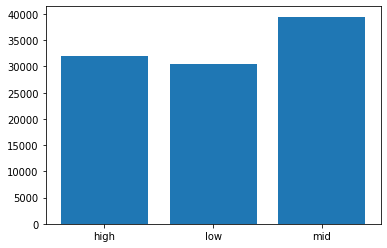

In [108]:
labels, counts = np.unique(new_rating,return_counts=True)


import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)
plt.show()

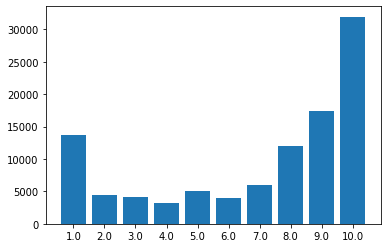

In [109]:
labels, counts = np.unique(all_cond_df['rating'],return_counts=True)


import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)
plt.show()

In [110]:
rating_df = pd.DataFrame(new_rating, columns=['label'])
rating_df.to_csv('y.csv')


In [111]:
all_reviews = [x.replace('|', ' ') if type(x)==str else '' for x in all_cond_df['all_bg'].to_list()  ]

all_reviews 

['symptom dr flu symptom',
 'experience major never experience',
 'hit side',
 'bladder infection',
 'make patch much pain not_think make take much point live',
 'flare week normal life get lead put humira gi put humira miracle',
 'really ready stop take ready stop',
 'small percentage seem small severely depressed immediately take sudden start take concerta read side read side',
 'wonder anyone vs brand name drug use find',
 'stomach help',
 'method say',
 'wait way not_sure good definitely feel switch different well not_sure well definitely physically ill get straighten also think dose mg medication cost high dose',
 'bone pain treat pain many story debilitate joint read many',
 'improve go',
 'burn pain foot sharp finger arthritis',
 'make life severe depression hugely make bipolar severe lamictal hugely',
 'calorie intake true kind yrs old also control',
 'diminish time result diminish personally thankful psoriasis clear also result',
 'turkey month cold turkey get urge quit cold p

In [113]:
np.savetxt("all_reviews.txt", all_reviews, delimiter=" ", newline = "\n", fmt="%s")

In [112]:
np.save('all_reviews', all_reviews)

In [118]:
with open('all_reviews.txt') as f:
    txt = f.read()

#ar = np.loadtxt("all_reviews.txt", dtype='str')
nw = txt.split('\n')

In [121]:
nw[:30]

['symptom dr flu symptom',
 'experience major never experience',
 'hit side',
 'bladder infection',
 'make patch much pain not_think make take much point live',
 'flare week normal life get lead put humira gi put humira miracle',
 'really ready stop take ready stop',
 'small percentage seem small severely depressed immediately take sudden start take concerta read side read side',
 'wonder anyone vs brand name drug use find',
 'stomach help',
 'method say',
 'wait way not_sure good definitely feel switch different well not_sure well definitely physically ill get straighten also think dose mg medication cost high dose',
 'bone pain treat pain many story debilitate joint read many',
 'improve go',
 'burn pain foot sharp finger arthritis',
 'make life severe depression hugely make bipolar severe lamictal hugely',
 'calorie intake true kind yrs old also control',
 'diminish time result diminish personally thankful psoriasis clear also result',
 'turkey month cold turkey get urge quit cold p

In [98]:
empty_inx = [i for i, x in enumerate(all_reviews) if x == ['']]
empty_inx

[20,
 56,
 61,
 67,
 71,
 83,
 86,
 90,
 92,
 99,
 102,
 107,
 110,
 131,
 149,
 152,
 163,
 174,
 176,
 177,
 226,
 228,
 234,
 240,
 243,
 248,
 252,
 258,
 279,
 288,
 291,
 298,
 312,
 348,
 365,
 370,
 460,
 461,
 475,
 486,
 541,
 551,
 555,
 562,
 571,
 577,
 588,
 593,
 596,
 605,
 608,
 620,
 626,
 629,
 646,
 657,
 662,
 665,
 669,
 670,
 673,
 678,
 691,
 693,
 696,
 706,
 708,
 712,
 716,
 723,
 727,
 741,
 746,
 765,
 770,
 781,
 787,
 819,
 831,
 844,
 853,
 869,
 878,
 880,
 883,
 888,
 891,
 895,
 917,
 919,
 933,
 946,
 965,
 985,
 990,
 1009,
 1024,
 1034,
 1045,
 1052,
 1071,
 1077,
 1090,
 1091,
 1094,
 1096,
 1099,
 1110,
 1112,
 1118,
 1126,
 1150,
 1172,
 1175,
 1183,
 1185,
 1224,
 1258,
 1262,
 1268,
 1270,
 1271,
 1285,
 1287,
 1295,
 1299,
 1302,
 1304,
 1307,
 1312,
 1320,
 1323,
 1324,
 1335,
 1340,
 1360,
 1365,
 1366,
 1382,
 1391,
 1395,
 1416,
 1450,
 1453,
 1454,
 1456,
 1459,
 1466,
 1473,
 1478,
 1486,
 1503,
 1509,
 1518,
 1519,
 1528,
 1583,
 1584,

In [102]:
np.save('empty_inx', empty_inx)

In [105]:
ar = np.load('all_reviews.npy',allow_pickle=True)

In [107]:
ar[0]

['symptom', 'dr', 'flu', 'symptom']